In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

def read_excel_file(file_path):
    """
    Read an Excel file and return a pandas DataFrame.

    Parameters:
    file_path (str): The path to the Excel file.

    Returns:
    pandas.DataFrame: The DataFrame containing the data from the Excel file.

    Raises:
    Exception: If there is an error reading the Excel file.
    """
    try:
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None
        
df = read_excel_file("DATA/Info_BDApnea_QuironMalaga.xlsx")

# Display the column names
print(df.columns)

# Display the first few rows of the DataFrame
df.head()

# print amount of rows
print(len(df))

# print amount of columns
print(len(df.columns))

total_patients = 683 # obtained from the excel file 

Index(['Patient', 'Comentarios', 'Audios tumbado', 'Fotos', 'Audio fs KHz',
       'Gender', 'EPWORTH', 'IAH', 'IAH Supino', 'IAH Lateral', 'Peso',
       'Talla', 'IMC', 'Edad', 'PerCervical', 'Fumador', 'Roncador',
       'Enfermedades', 'Sala/Ruidos', 'Imagen', 'Dialecto', 'DIST EXT OJOS',
       'DIST BARB-LOB', 'Cansancio', 'Concentrarse', 'PerdRespNoche', 'HiperT',
       'EstHOSP'],
      dtype='object')
873
28


In [135]:
# Create a new DataFrame with only the first 683 rows
df = df.iloc[:total_patients]

# display the last few rows of the new DataFrame
df.tail()

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
678,P0679,QMH688(patient0753) usa CPAP,NO_UNAREP,si,55/16,hombre,NaN,9.2,15.9,7.3,...,443,nd,andaluz/Málaga,10.860,15.019,no,no,1,1.0,1.0
679,P0680,QMH689(patient0754),NO_UNAREP,si,55/16,hombre,NaN,52.2,53.4,50.3,...,442,nd,Mezcla,10.268,14.383,si,no,1,0.0,0.0
680,P0681,QMH690(patient0755) usa CPAP,NO_UNAREP,si,55/16,hombre,NaN,NaN,NO disponible,NaN,...,434,nd,andaluz/Málaga,9.181,14.35,no,no,1,1.0,0.0
681,P0682,QMH691(patient0756),NO_UNAREP,si,55/16,mujer,NaN,5.4,NaN,este sobre todo,...,436,nd,andaluz/Málaga,8.543,11.956,si,si,1,0.0,1.0
682,P0683,QMH692(patient0757) FOTOS BOCA y RESPIRACIONES...,NO_UNAREP,si,55/16,mujer,NaN,31.9,NaN,NaN,...,422,nd,andaluz/Málaga,8.535,13.517,no,no,1,1.0,NaN


### Check the amount of NaN values in the feature columns

In [136]:
# Replace -1 with NaN in the 'IMC' column
df['IMC'].replace(-1, np.nan, inplace=True)

# Replace 'ns' with NaN in the 'Roncador' and 'Fumador' columns
df['Roncador'].replace('ns', np.nan, inplace=True)
df['Fumador'].replace('ns', np.nan, inplace=True)

# Display the unique values in the modified columns to confirm the changes
print(df['IMC'].unique())
print(df['Roncador'].unique())
print(df['Fumador'].unique())

[nan]
[nan 'si' 'no' 'poco' 'si´(protesis boca para dormir)' 'no con CPAD'
 'si sin CPAP' 'CPAP']
[nan 'si' 'no' 'antiguo' 'poco' 'si (poco)']


Columns with NaN values:
EPWORTH          628
IAH               34
IAH Supino        95
IAH Lateral      158
Peso               5
Talla              6
IMC              683
Edad               5
PerCervical        5
Fumador           19
Roncador         180
Enfermedades       5
Sala/Ruidos        3
Imagen             3
Dialecto           3
DIST EXT OJOS    378
DIST BARB-LOB    378
Cansancio        504
Concentrarse     504
PerdRespNoche    658
HiperT           660
EstHOSP          663
dtype: int64
Rows with NaN values:
    Patient                                        Comentarios Audios tumbado  \
0     P0001  es el Patient0002 (fotos) 3 (sentado) y 4 (tum...             si   
1     P0002          Es el Patient0006 (sentado) y 7 (tumbado)             si   
2     P0003                                  Patient 8, 9 y 10             si   
3     P0004                                    Patient 13 y 14     si_codigos   
4     P0005                       Patient0015 los códigos QMH5     si_cod

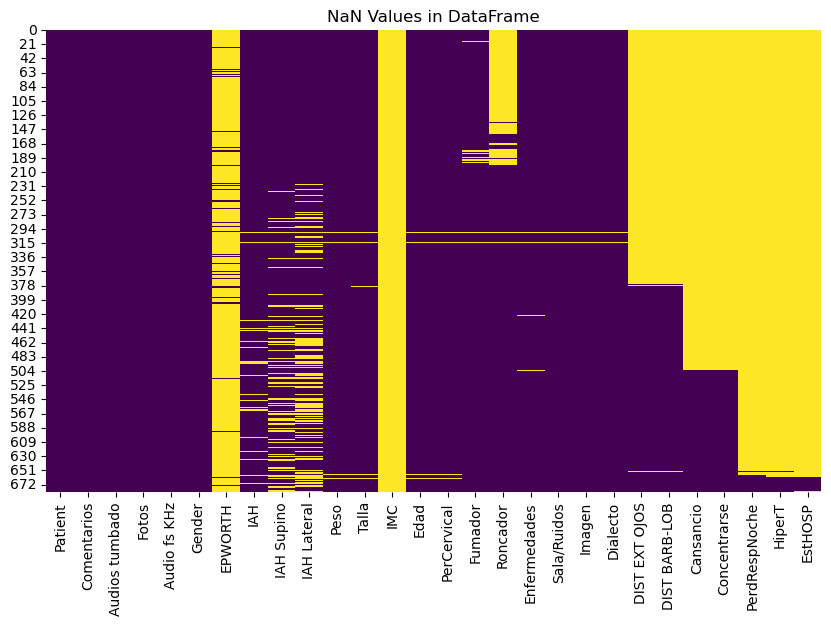

In [137]:
def explore_nan_values(df):
    """
    Explore NaN values in a DataFrame and visualize them.

    Parameters:
    df (pandas.DataFrame): The DataFrame to explore NaN values.

    Returns:
    None
    """
    # Check for NaN values in the DataFrame
    nan_values = df.isnull().sum()

    # Display the columns with NaN values
    print("Columns with NaN values:")
    print(nan_values[nan_values > 0])

    # Display the rows with NaN values
    print("Rows with NaN values:")
    print(df[df.isnull().any(axis=1)])

    # Visualize NaN values
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
    plt.title("NaN Values in DataFrame")
    plt.show()

explore_nan_values(df)

In [138]:
# Check unique values in the 'Fumador' column and their counts
fumador_counts = df['Fumador'].value_counts()
print("Unique values in 'Fumador' column and their counts:")
print(fumador_counts)

# Check unique values in the 'Roncador' column and their counts
roncador_counts = df['Roncador'].value_counts()
print("Unique values in 'Roncador' column and their counts:")
print(roncador_counts)

# ns = no sabe (don't know)

# Check the number of NaN values in the 'EPWORTH' column
epworth_nan_count = df['EPWORTH'].isna().sum()
print(f"Number of NaN values in 'EPWORTH' column: {epworth_nan_count}")

Unique values in 'Fumador' column and their counts:
Fumador
no           373
si           165
antiguo      119
poco           6
si (poco)      1
Name: count, dtype: int64
Unique values in 'Roncador' column and their counts:
Roncador
si                                466
no                                 18
CPAP                               12
no con CPAD                         4
poco                                1
si´(protesis boca para dormir)      1
si sin CPAP                         1
Name: count, dtype: int64
Number of NaN values in 'EPWORTH' column: 628


### Extract only the desired columns from the DataFrame and change the names

In [139]:
def rename_columns(df, column_mapping):
    """
    Rename the columns of a DataFrame based on a column mapping.

    Parameters:
    df (pandas.DataFrame): The DataFrame to rename columns.
    column_mapping (dict): A dictionary mapping old column names to new column names.

    Returns:
    pandas.DataFrame: The DataFrame with renamed columns.
    """
    return df.rename(columns=column_mapping)

column_mapping = {
    'Patient': 'Patient',
    'Gender': 'Gender',
    'IAH': 'AHI',
    'Peso': 'Weight',
    'Edad': 'Age',
    'Talla': 'Height',
    'PerCervical': 'Cervical',
}

df = rename_columns(df, column_mapping)[list(column_mapping.values())]

# Display the column names
print(df.columns)

# Display the first few rows of the DataFrame 
print(df.head())

# Display the shape of the DataFrame
print(df.shape)

# Display the data types of the columns
print(df.dtypes)


Index(['Patient', 'Gender', 'AHI', 'Weight', 'Age', 'Height', 'Cervical'], dtype='object')
  Patient  Gender   AHI Weight   Age  Height  Cervical
0   P0001  hombre  71.0     82  39.0   168.0      -1.0
1   P0002  hombre  29.6    119  56.0   174.0      48.0
2   P0003  hombre  56.0     -1  46.0    -1.0      43.0
3   P0004  hombre  19.7     78  39.0   168.0      42.0
4   P0005  hombre   9.0     80  32.0   173.0      40.0
(683, 7)
Patient      object
Gender       object
AHI         float64
Weight       object
Age         float64
Height      float64
Cervical    float64
dtype: object


### Check for data types

In [140]:
# print unique values of the weight column 
print(df['Weight'].unique())

# Assuming df is your DataFrame and 'Weight' is the column you're interested in
df['Weight_numeric'] = pd.to_numeric(df['Weight'], errors='coerce')

# Find rows where 'Weight_numeric' is NaN, indicating a non-numeric value in the 'Weight' column
non_numeric_rows = df[df['Weight_numeric'].isna()]

# Display these rows
# print(non_numeric_rows)

# Drop the 'Weight_numeric' column if you no longer need it
df.drop('Weight_numeric', axis=1, inplace=True)

# Coerce 'Weight' to be numeric or NaN
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Display the data types of the columns to confirm the change
print(df.dtypes)

# Display unique values in the 'Weight' column
print(df['Weight'].unique())

[82 119 -1 78 80 109 86 145 72 90 69 50 55 95 88 65 89 63 113 60 107 70 77
 100 74 93 105 68 91 84 110 115 83 125 92 67 97 98 75 94 85 87 106 81 76
 71 73 66 101 52 102 120 140 161 96 108 79 121 104 64 62 162 111 118 45 99
 130 59 103 165 53 58 117 nan 56 54 133 57 128 112 149 135 'no se saben'
 132 114 61 131 123 122 116 'No quiere saberlo' 160 48]
Patient      object
Gender       object
AHI         float64
Weight      float64
Age         float64
Height      float64
Cervical    float64
dtype: object
[ 82. 119.  -1.  78.  80. 109.  86. 145.  72.  90.  69.  50.  55.  95.
  88.  65.  89.  63. 113.  60. 107.  70.  77. 100.  74.  93. 105.  68.
  91.  84. 110. 115.  83. 125.  92.  67.  97.  98.  75.  94.  85.  87.
 106.  81.  76.  71.  73.  66. 101.  52. 102. 120. 140. 161.  96. 108.
  79. 121. 104.  64.  62. 162. 111. 118.  45.  99. 130.  59. 103. 165.
  53.  58. 117.  nan  56.  54. 133.  57. 128. 112. 149. 135. 132. 114.
  61. 131. 123. 122. 116. 160.  48.]


In [141]:
# check types of the dataframe
print(df.dtypes)

# Change to categorical dtype is done to be more memory efficient
# Change the 'Gender' column to categorical
df['Gender'] = df['Gender'].astype('category')

# Change the 'Patient' column to categorical
df['Patient'] = df['Patient'].astype('category')

# print the head of the dataframe
print(df.head())

# Display the data types of the columns in the cleaned DataFrame
print(df.dtypes)


Patient      object
Gender       object
AHI         float64
Weight      float64
Age         float64
Height      float64
Cervical    float64
dtype: object
  Patient  Gender   AHI  Weight   Age  Height  Cervical
0   P0001  hombre  71.0    82.0  39.0   168.0      -1.0
1   P0002  hombre  29.6   119.0  56.0   174.0      48.0
2   P0003  hombre  56.0    -1.0  46.0    -1.0      43.0
3   P0004  hombre  19.7    78.0  39.0   168.0      42.0
4   P0005  hombre   9.0    80.0  32.0   173.0      40.0
Patient     category
Gender      category
AHI          float64
Weight       float64
Age          float64
Height       float64
Cervical     float64
dtype: object


In [142]:
### test
# Create a DataFrame with an object column
df_test = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female']
})

# Check memory usage before conversion
print(df_test.memory_usage(deep=True))

# Convert the 'Gender' column to categorical
df_test['Gender'] = df_test['Gender'].astype('category')

# Check memory usage after conversion
print(df_test.memory_usage(deep=True))

Index     128
Gender    311
dtype: int64
Index     128
Gender    237
dtype: int64


### Check for NaN values 

Columns with NaN values:
AHI         34
Weight       8
Age          8
Height       7
Cervical    12
dtype: int64
Rows with NaN values:
    Patient  Gender   AHI  Weight   Age  Height  Cervical
0     P0001  hombre  71.0    82.0  39.0   168.0       NaN
2     P0003  hombre  56.0     NaN  46.0     NaN      43.0
10    P0011  hombre  14.2    90.0  29.0   182.0       NaN
11    P0012  hombre  10.0    69.0  48.0   169.0       NaN
78    P0079  hombre   9.0    81.0  50.0   175.0       NaN
178   P0179  hombre  45.0   106.0   NaN   184.0       NaN
179   P0180  hombre   5.3    83.0   NaN   175.0       NaN
180   P0181  hombre   8.4    71.0   NaN   170.0       NaN
260   P0261  hombre   NaN     NaN   NaN     NaN       NaN
299   P0300  hombre   NaN     NaN   NaN     NaN       NaN
314   P0315   mujer   NaN     NaN   NaN     NaN       NaN
331   P0332  hombre   NaN   100.0  52.0   178.0      42.0
379   P0380   mujer   0.0     NaN  71.0     NaN      40.0
429   P0430  hombre   NaN   131.0  49.0   175.0      

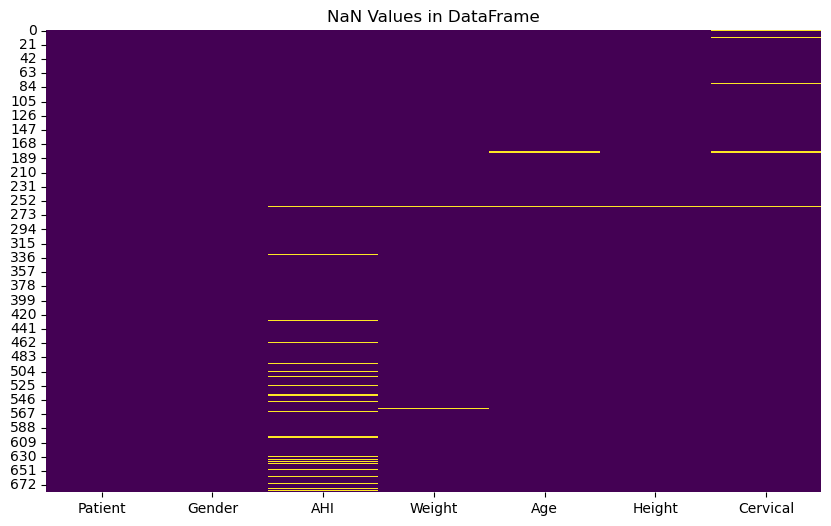

In [150]:
# Replace -1 with NaN in the entire DataFrame
df.replace(-1, np.nan, inplace=True)

# Explore NaN values in the DataFrame
explore_nan_values(df)

#### Use data imputation to deal with the NaN values in the Weight, Age, Height and Cervical columns


  Patient  Gender   AHI      Weight   Age      Height   Cervical
0   P0001  hombre  71.0   82.000000  39.0  168.000000  40.617735
1   P0002  hombre  29.6  119.000000  56.0  174.000000  48.000000
2   P0003  hombre  56.0   87.797037  46.0  171.399408  43.000000
3   P0004  hombre  19.7   78.000000  39.0  168.000000  42.000000
4   P0005  hombre   9.0   80.000000  32.0  173.000000  40.000000
Cervical    0
Age         0
Weight      0
Height      0
dtype: int64
Columns with NaN values:
AHI    34
dtype: int64
Rows with NaN values:
    Patient  Gender  AHI      Weight        Age      Height   Cervical
260   P0261  hombre  NaN   87.797037  49.503704  171.399408  40.617735
299   P0300  hombre  NaN   87.797037  49.503704  171.399408  40.617735
314   P0315   mujer  NaN   87.797037  49.503704  171.399408  40.617735
331   P0332  hombre  NaN  100.000000  52.000000  178.000000  42.000000
429   P0430  hombre  NaN  131.000000  49.000000  175.000000  45.000000
441   P0442   mujer  NaN   90.000000  32.0000

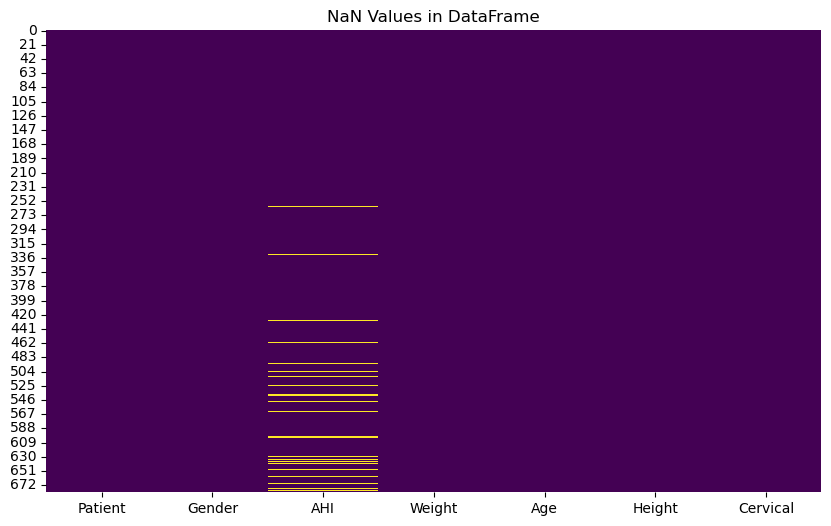

In [197]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the 'Cervical' and 'Age' columns
df[['Cervical', 'Age', 'Weight', 'Height']] = imputer.fit_transform(df[['Cervical', 'Age', 'Weight', 'Height']])

# Display the first few rows of the DataFrame to confirm the changes
print(df.head())

# Check if there are any NaN values left in the 'Cervical' and 'Age' columns
print(df[['Cervical', 'Age', 'Weight', 'Height']].isna().sum())

explore_nan_values(df)

Amount of rows dropped:  34
(649, 7)
Columns with NaN values:
Series([], dtype: int64)
Rows with NaN values:
Empty DataFrame
Columns: [Patient, Gender, AHI, Weight, Age, Height, Cervical]
Index: []


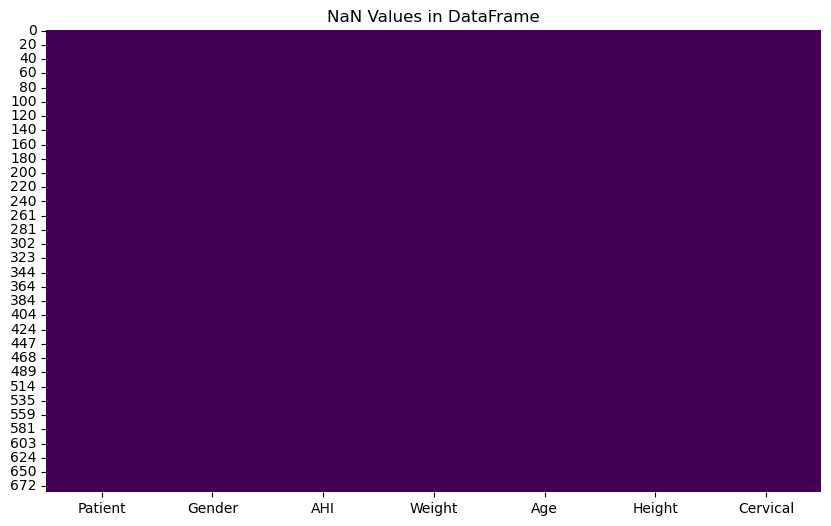

In [198]:
# Drop rows with NaN values
df_cleaned = df.dropna()

# check how many rows have been dropped 
print("Amount of rows dropped: ", total_patients - df_cleaned.shape[0])

# Assuming df_cleaned is a slice from another DataFrame, ensure it's a copy
df_cleaned = df_cleaned.copy()

# Display the shape of the cleaned DataFrame
print(df_cleaned.shape)

# Explore NaN values in the cleaned DataFrame
explore_nan_values(df_cleaned)

### Add a new clinical feature BMI and encode the Gender column 

In [199]:
# Calculate BMI using the formula: BMI = Weight (kg) / (Height (m)^2)
df_cleaned['BMI'] = df_cleaned['Weight'] / (df_cleaned['Height'] / 100) ** 2

# Perform one hot encoding on the 'Gender' column
df_cleaned['Gender'] = df_cleaned['Gender'].apply(lambda x: 1 if x == 'hombre' else 0)

print(df_cleaned.head())

  Patient Gender   AHI      Weight   Age      Height   Cervical        BMI
0   P0001      1  71.0   82.000000  39.0  168.000000  40.617735  29.053288
1   P0002      1  29.6  119.000000  56.0  174.000000  48.000000  39.305060
2   P0003      1  56.0   87.797037  46.0  171.399408  43.000000  29.885548
3   P0004      1  19.7   78.000000  39.0  168.000000  42.000000  27.636054
4   P0005      1   9.0   80.000000  32.0  173.000000  40.000000  26.729927


### Create new Excel file from cleaned DataFrame

In [200]:
# Write the cleaned DataFrame to a new Excel file
output_filepath = "DATA\OSA_DB_cleaned.xlsx"
df_cleaned.to_excel(output_filepath, index=False)